In [1]:
import os
os.chdir("E:\\Machine learning folder\\Datasets")

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns


In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
for i in df.columns:
    print(i," ", df[i].nunique())    

area_type   4
availability   81
location   1305
size   31
society   2688
total_sqft   2117
bath   19
balcony   4
price   1994


In [4]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [5]:
## in the availabiity column:
## lets doo ready to move as 1 and rest other choices as 0

df['availability'].replace(['Ready To Move','Immediate Possession'],[2,1],inplace=True)

In [6]:
## assigning the dates as 0
## more integer value: more preference 
## ordinality

for i in range(len(df['availability'])):
    if '-' in str(df['availability'][i]):
        df['availability'][i] = 0

df['availability'].value_counts()
          

D:\Anaconda\envs\gpu\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


2    10581
0     2723
1       16
Name: availability, dtype: int64

In [7]:
df.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [8]:
df['area_type'].replace(["Super built-up  Area",'Built-up  Area','Plot  Area','Carpet  Area'],[4,3,2,1],inplace=True)
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,4,0,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,2,2,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,3,2,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,4,2,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,4,2,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [9]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,4,0,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,2,2,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,3,2,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,4,2,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,4,2,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [10]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [11]:
(df[~df['total_sqft'].apply(is_float)]).head(15)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,4,0,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000
56,3,0,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000
81,3,0,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500
122,4,0,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000
137,4,0,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005
165,4,0,Sarjapur,2 BHK,Kinuerg,1145 - 1340,2.0,0.0,43.490
188,4,2,KR Puram,2 BHK,MCvarar,1015 - 1540,2.0,0.0,56.800
224,4,0,Devanahalli,3 BHK,Jurdsig,1520 - 1740,NaN,NaN,74.820
410,4,2,Kengeri,1 BHK,NaN,34.46Sq. Meter,1.0,0.0,18.500
549,4,0,Hennur Road,2 BHK,Shxorm,1195 - 1440,2.0,0.0,63.770


In [12]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0].strip())+float(tokens[1].strip()))/2
    try:
        return float(x)
    except:
        return None 

In [13]:
## there are some values such as perch, yard etc. 
## replace that by None

df1 = df.copy()
df1.total_sqft = df.total_sqft.apply(convert_sqft_to_num)
df1 = df1[df1.total_sqft.notnull()]
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,4,0,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,2,2,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,3,2,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,4,2,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,4,2,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,3,2,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00
13316,4,2,Richards Town,4 BHK,NaN,3600.0,5.0,NaN,400.00
13317,3,2,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00
13318,4,0,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00


In [14]:
df1['total_sqft'] = pd.to_numeric(df1['total_sqft'])
df1['availability'] = pd.to_numeric(df1['availability'])

In [15]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5472
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [16]:
df1.drop("society",axis=1,inplace=True)
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,4,0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,2,2,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,3,2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00
3,4,2,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00
4,4,2,Kothanur,2 BHK,1200.0,2.0,1.0,51.00


In [17]:
df1['size'].fillna(method='bfill',inplace=True)
df1['location'].fillna(method='bfill',inplace=True)

df1.isnull().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath             73
balcony         605
price             0
dtype: int64

In [18]:
df1['size'].fillna(method = 'bfill',inplace=True)
df1['size'].isna().sum()

0

In [19]:
df2 = df1.copy()
df2['bhk'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))
df2.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [20]:
## Adding a new feature

df3 = df2.copy()
df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft']
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,4,0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,2,2,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,3,2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,4,2,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,4,2,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [21]:
top_location = df3.location.value_counts(ascending=False)
top_location

Whitefield                           538
Sarjapur  Road                       399
Electronic City                      302
Kanakpura Road                       271
Thanisandra                          233
                                    ... 
Virgonagar                             1
Kasthuri Nagar East Of NGEF            1
Banashankari 2nd Stage                 1
RBI Layout                             1
J.P.nagar 6th Phase.Sarakki Nagar      1
Name: location, Length: 1299, dtype: int64

In [22]:
location_less_than10 = top_location[top_location<=10]
location_less_than10

Kalkere                              10
Dodsworth Layout                     10
Nagappa Reddy Layout                 10
Sadashiva Nagar                      10
Nagadevanahalli                      10
                                     ..
Virgonagar                            1
Kasthuri Nagar East Of NGEF           1
Banashankari 2nd Stage                1
RBI Layout                            1
J.P.nagar 6th Phase.Sarakki Nagar     1
Name: location, Length: 1059, dtype: int64

In [23]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_less_than10 else x)
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,4,0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,2,2,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,3,2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,4,2,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,4,2,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [24]:
print(df3.isna().sum())

df3['bath'].fillna(df3['bath'].mean(), inplace=True)
df3['balcony'].fillna(df3['balcony'].mean(), inplace=True)

area_type           0
availability        0
location            0
size                0
total_sqft          0
bath               73
balcony           605
price               0
bhk                 0
price_per_sqft      0
dtype: int64


In [25]:
df3.shape

(13274, 10)

In [26]:
## places with total_sqft per bhk is less than 300
## they sound to be absurd: acts as outlier
## so lets remove them 

df4 = df3[~((df3.total_sqft/df3.bhk)<300)]

df4.shape


(12530, 10)

## Removing outliers

In [27]:
df4.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [28]:
## theres a huge diff between min and max values for price per dq ft.
## so lets remove the outliers

## from the above cell:  75% data is within 6916 mark
## so lets remove the outliers on left and right of 1st standard deviation

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df],ignore_index = True)

    return df_out

df5 = remove_pps_outliers(df4)
df5.shape


(10305, 10)

## plots for seeing the 2 bhk and 3 bhk prices



In [29]:
def scatter_plot(df,location):
    bhk2 = df[(df.location == location) & (df.bhk==2)]
    bhk3 = df[(df.location == location) & (df.bhk==3)]
    plt.scatter(bhk2.price_per_sqft,bhk2.price,color='blue',label='2 BHK')
    plt.scatter(bhk3.price_per_sqft,bhk3.price,color='green',label='3 BHK',marker='+')
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
   

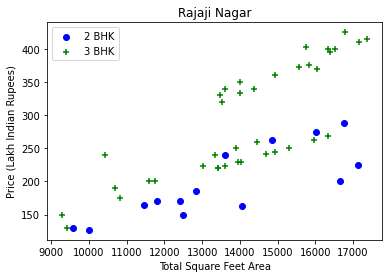

In [30]:
scatter_plot(df5,'Rajaji Nagar')

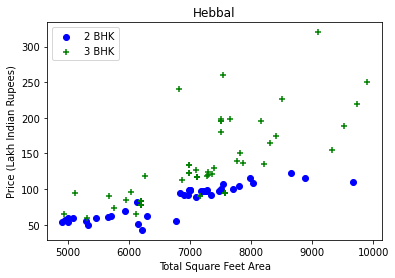

In [31]:
scatter_plot(df5,"Hebbal")

In [32]:
## there are some points in a particular area where price of 2 bhk > 3 bhk
## thats something very erratic and hard to digest

## so lets remove those 2bhk flats that have price per sqft less than that of 1 bhk mean value_counts

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df6 = remove_bhk_outliers(df5)
df6.shape

(7361, 10)

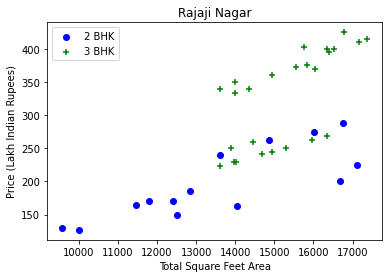

In [33]:
scatter_plot(df6,"Rajaji Nagar")


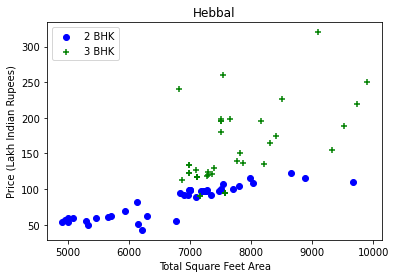

In [34]:
scatter_plot(df6,"Hebbal")


In [35]:
## the best feature
## no. of bedrooms should match with no. of bedrooms
## say 2 more baths are allowed
## bathrooms can't be more than the no. of bedrooms

df6[ df6['bath'] > (df6['bhk'] + 2)]
## so lets remove these

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1648,3,2,Chikkabanavar,4 Bedroom,2460.0,7.0,2.000000,80.0,4,3252.032520
5268,3,2,Nagasandra,4 Bedroom,7000.0,8.0,1.585682,450.0,4,6428.571429
6750,4,2,Thanisandra,3 BHK,1806.0,6.0,2.000000,116.0,3,6423.034330
8459,4,2,other,6 BHK,11338.0,9.0,1.000000,1000.0,6,8819.897689


In [36]:
df7 = df6[ df6['bath'] < (df6['bhk'] + 2)]
df7.shape

(7282, 10)

In [37]:
df7.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1,4,2,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000
2,2,2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.0,2,6916.666667
3,4,2,Devarachikkanahalli,2 BHK,1170.0,2.0,2.0,40.0,2,3418.803419
4,4,2,Devarachikkanahalli,3 BHK,1425.0,2.0,2.0,65.0,3,4561.403509
5,4,2,Devarachikkanahalli,2 BHK,947.0,2.0,2.0,43.0,2,4540.654699


In [38]:
df8 = df7.drop(['size','price_per_sqft'],axis=1)
df8.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
1,4,2,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2
2,2,2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2
3,4,2,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2
4,4,2,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3
5,4,2,Devarachikkanahalli,947.0,2.0,2.0,43.0,2


In [39]:
dummies = pd.get_dummies(df8.location)
df9 = pd.concat([df8,dummies.drop('other',axis=1)],axis=1)
df9.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,Devarachikkanahalli,1st Block Jayanagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,4,2,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
5,4,2,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df10 = df9.drop('location',axis=1)
df10.shape

(7282, 247)

In [41]:
df10.head()

,area_type,availability,total_sqft,bath,balcony,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,4,2,1250.0,2.0,2.0,40.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1200.0,2.0,2.0,83.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2,1170.0,2.0,2.0,40.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2,1425.0,2.0,2.0,65.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,2,947.0,2.0,2.0,43.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Building a model

In [42]:
X = df10.drop('price',axis=1)
y = df10.price

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [44]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
lin_reg.score(X_test,y_test)

0.7731396586819542

<AxesSubplot:>

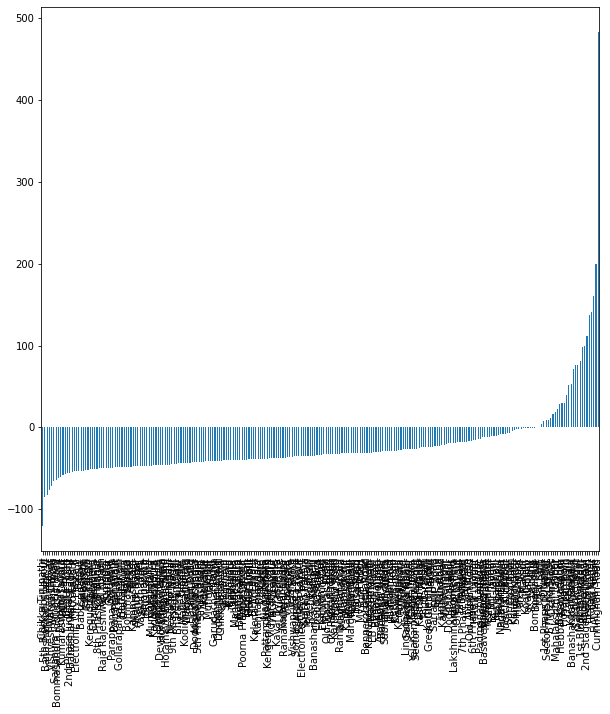

In [45]:
predictors = X_train.columns
coeff = pd.Series(lin_reg.coef_,predictors).sort_values()
plt.figure(figsize =(10,10))
coeff.plot(kind='bar')


In [116]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.001)  
ridge_reg.fit(X_train,y_train)
ridge_reg.score(X_test,y_test)

0.773142018774867

In [104]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.001) 
lasso_reg.fit(X_train,y_train)
lasso_reg.score(X_test,y_test)

0.7731827604880768

<AxesSubplot:>

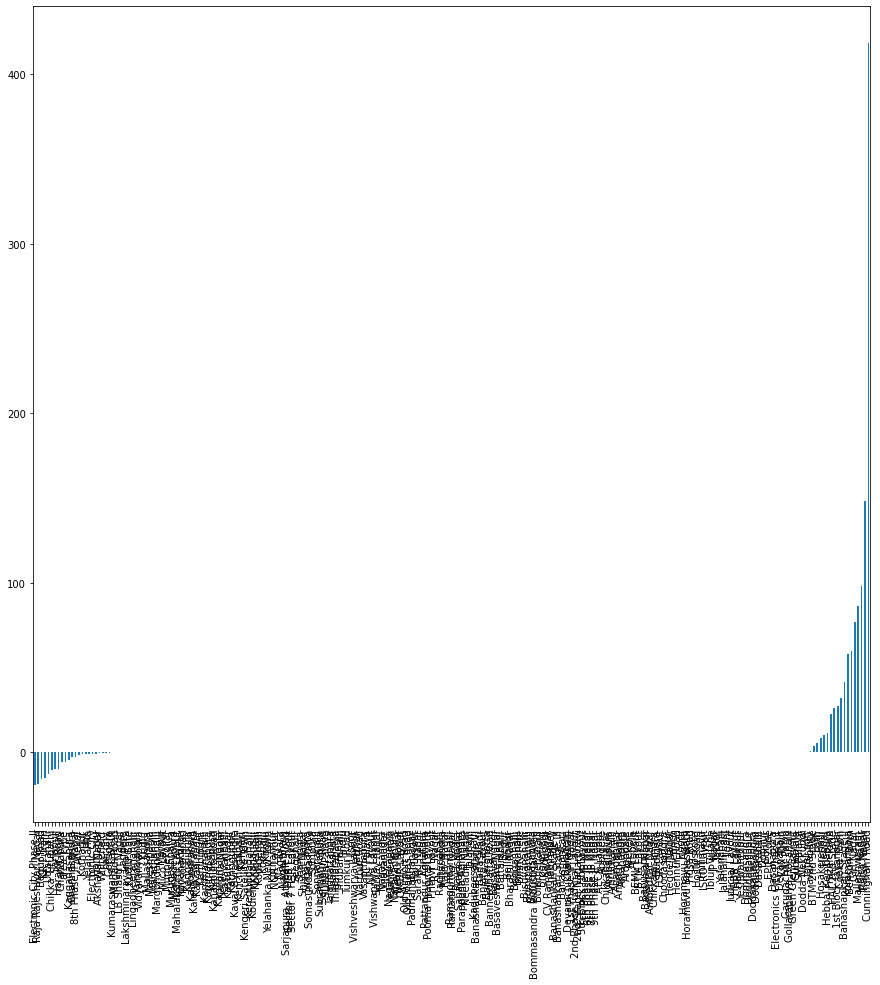

In [47]:
predictors = X_train.columns
coeff = pd.Series(lasso_reg.coef_,predictors).sort_values()
plt.figure(figsize =(15,15))
coeff.plot(kind='bar')


In [113]:
from sklearn.linear_model import ElasticNet
elastic_reg = ElasticNet(alpha=0.0001,l1_ratio=0.9)  ## alpha is 1 and l1_ratio is 0.5 (Default Values)
elastic_reg.fit(X_train,y_train)
elastic_reg.score(X_test,y_test)

0.773268761730976

<AxesSubplot:>

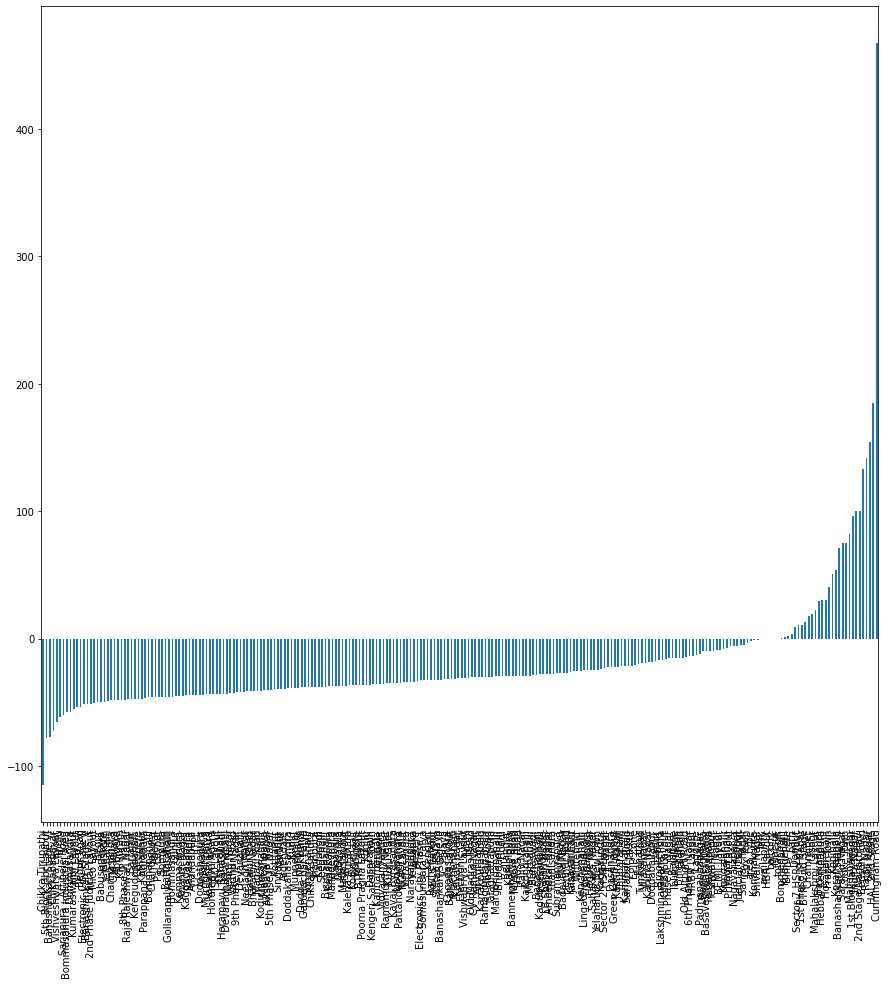

In [49]:
predictors = X_train.columns
coeff = pd.Series(elastic_reg.coef_,predictors).sort_values()
plt.figure(figsize =(15,15))
coeff.plot(kind='bar')


In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5,test_size =0.2,random_state =0)
cross_val_score(LinearRegression(),X,y,cv=5)

array([-2.11562934e+14, -2.34208383e+15,  6.02630560e-01,  5.38332197e-01,
       -2.77583770e+17])

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


def find_best_model_using_gridsearchcv(X,y):
    algos = {

        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },

    
        'lasso': {  ## L1 regression
            'model': Lasso(),
            'params': {
                'alpha': [1,2,0.01,0.5,0.25],
                'selection': ['random', 'cyclic']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.843111,{'normalize': True}
1,lasso,0.840047,"{'alpha': 0.01, 'selection': 'cyclic'}"
2,decision_tree,0.763350,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [52]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor(random_state=2,criterion='friedman_mse',splitter= 'best')   
model_tree.fit(X_train,y_train)
model_tree.score(X_test,y_test)


0.5671798228562954

In [53]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500,max_depth=10)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.6633849514365311

In [54]:
X_train.shape
X_train_copy = X_train.copy()
X_train_copy = X_train.iloc[:,0:50]

X_test_copy = X_test.iloc[:,0:50]

In [55]:
print(X_train_copy.shape)
print(y_train.shape)

print(X_test_copy.shape)
print(y_test.shape)

(5825, 50)
(5825,)
(1457, 50)
(1457,)


0.6666514237791041


Text(0.5, 1.0, 'Linear Regression Coeff.')

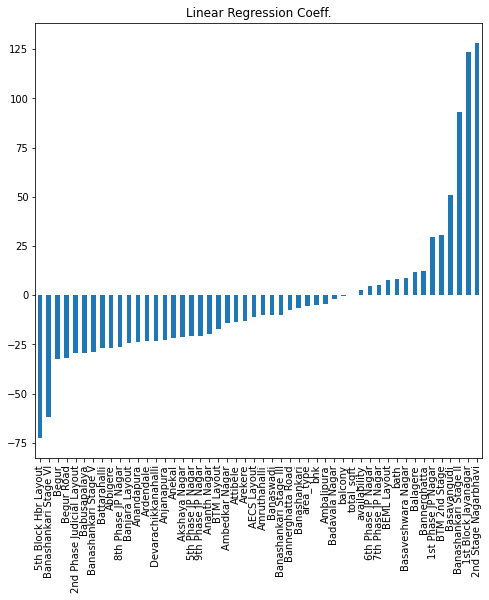

In [65]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_copy,y_train)
print(lin_reg.score(X_test_copy,y_test))

predictors = X_train_copy.columns
coeff = pd.Series(lin_reg.coef_,predictors).sort_values()
plt.figure(figsize =(8,8))
coeff.plot(kind='bar')
plt.title("Linear Regression Coeff.")


0.6666987407562954


Text(0.5, 1.0, ' Ridge Regression Coeff.')

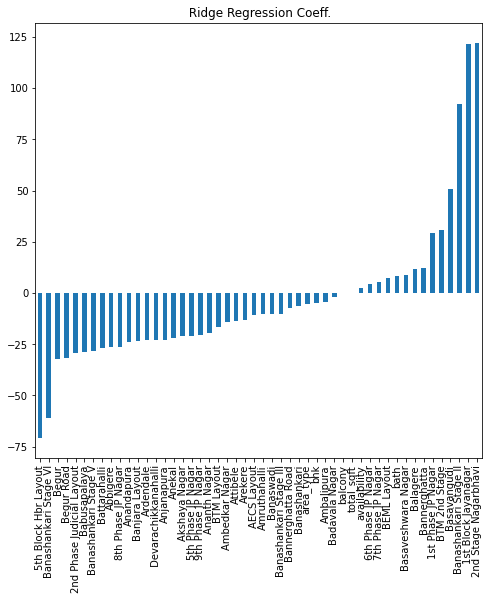

In [100]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.1)  ## alpha is 1 and l1_ratio is 0.5 (Default Values)
ridge_reg.fit(X_train_copy,y_train)
print(ridge_reg.score(X_test_copy,y_test))

predictors = X_train_copy.columns
coeff = pd.Series(ridge_reg.coef_,predictors).sort_values()
plt.figure(figsize =(8,8))
coeff.plot(kind='bar')
plt.title(" Ridge Regression Coeff.")

0.6666070017148378


Text(0.5, 1.0, ' Lasso Regression Coeff.')

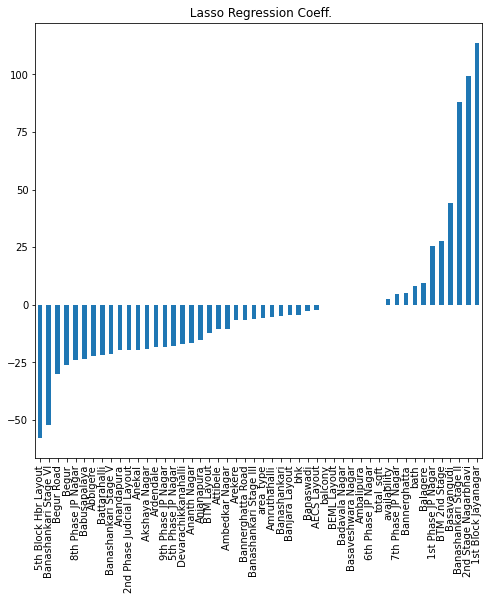

In [87]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.01)  ## alpha is 1 and l1_ratio is 0.5 (Default Values)
lasso_reg.fit(X_train_copy,y_train)
print(lasso_reg.score(X_test_copy,y_test))

predictors = X_train_copy.columns
coeff = pd.Series(lasso_reg.coef_,predictors).sort_values()
plt.figure(figsize =(8,8))
coeff.plot(kind='bar')
plt.title(" Lasso Regression Coeff.")

0.6658861841952262


Text(0.5, 1.0, ' Elastic Net Regression Coeff.')

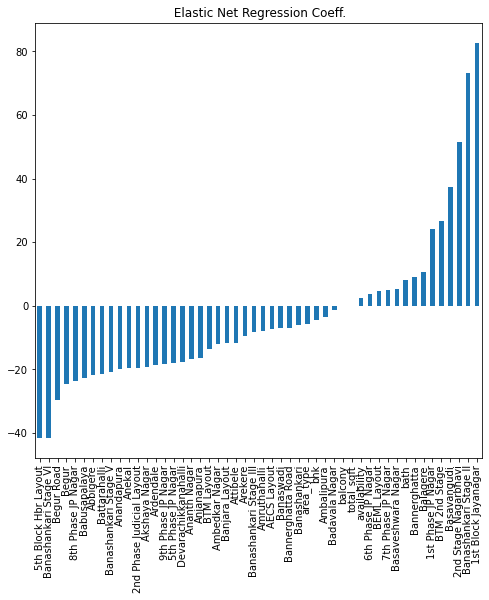

In [98]:
from sklearn.linear_model import ElasticNet
elastic_reg = ElasticNet(alpha=0.001,l1_ratio=0.5)  ## alpha is 1 and l1_ratio is 0.5 (Default Values)
elastic_reg.fit(X_train_copy,y_train)
print(elastic_reg.score(X_test_copy,y_test))
predictors = X_train_copy.columns
coeff = pd.Series(elastic_reg.coef_,predictors).sort_values()
plt.figure(figsize =(8,8))
coeff.plot(kind='bar')
plt.title(" Elastic Net Regression Coeff.")